In [1]:
import numpy as np
import os, sys
import pandas as pd
import scipy.stats
import scipy.io as spio


# root directory is 2 dirs up from this file
# path = os.path.realpath(__file__).split('/')
# root = '/'+os.path.join(*path[0:-3])
root = '/usr/local/serenceslab/maggie/shapeDim/'
sys.path.append(os.path.join(root, 'Analysis'))


import matplotlib.pyplot as plt

from code_utils import data_utils, file_utils

import scipy.io as spio
import deconv

In [2]:
subjects = np.arange(1,8)

h_all = []

for ss in subjects:
    
    print(ss)
    h, trial_cond_names, roi_names = deconv.get_hrfs_maintask(ss=ss)
    
    h_all += [h]

1
2
3
4
5
6
7


In [4]:
h[0]['hrfs'].shape

(20, 6, 1520)

In [13]:
run_const = h_all[0][0]['b'][6*20:-1,:]
np.min(run_const.ravel()), np.max(run_const.ravel())

(-0.4516458676618163, 0.3861143823993392)

In [3]:
# trial_cond_names = ['Linear-1 Easy','Linear-1 Hard','Linear-2 Easy','Linear-2 Hard','Checker Easy','Checker Hard']
n_trial_conds =len(trial_cond_names)

In [10]:
# roi_names = ['V1','V2','V3','V3AB','hV4','LO1','LO2','IPSall']
n_rois = len(roi_names)
n_subjects = len(subjects)

In [5]:
from matplotlib import cm
task_names = ['Linear (1)','Linear (2)','Checker', 'Repeat (one-back)'];
n_tasks = len(task_names)
task_colors = np.flipud(cm.GnBu(np.linspace(0,1,5))[1:5,:])


In [6]:
nTRs_concat = 20;
time_axis = np.arange(0,nTRs_concat) * 0.8
avgTRs_targ = [4,7];

In [7]:
si=0; ri=0;
hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
hrfs.shape

(20, 6)

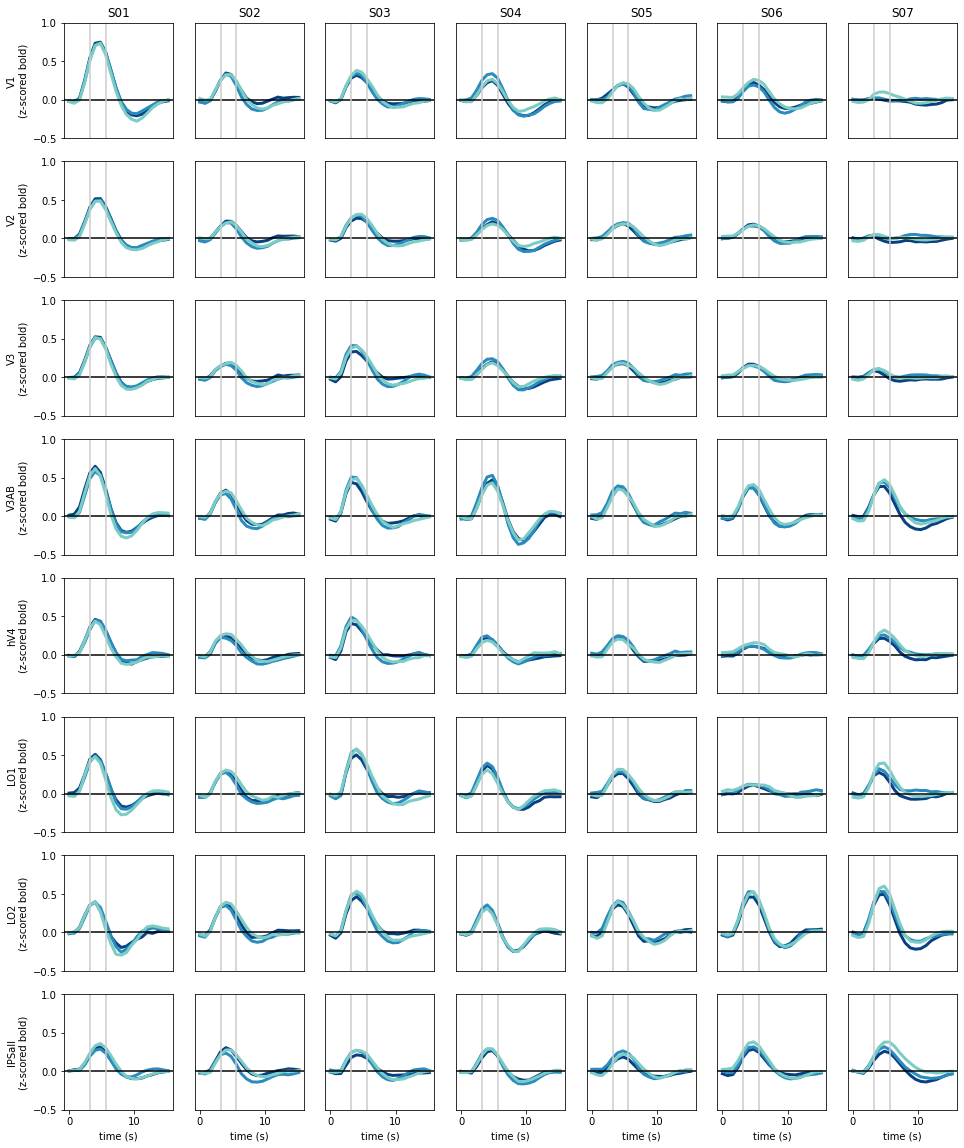

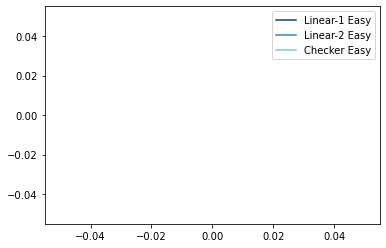

In [8]:
plt.figure(figsize=(16,20))

conds_plot = [0,2,4]
pi = 0;
for ri in range(n_rois):
    
    for si, ss in enumerate(subjects):

        pi+=1
        plt.subplot(n_rois, n_subjects, pi)
        
        hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
        
        for ci, cc in enumerate(conds_plot):

            plt.plot(time_axis, hrfs[:,cc], color=task_colors[ci, :], lw = 3)

        
        plt.ylim([-0.5, 1])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])
        
        if ri==0:
            plt.title('S%02d'%(ss))
        if ri<(n_rois-1):
            plt.xticks([])
        else:
            plt.xlabel('time (s)')
            
        if si==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
        else:
            plt.yticks([])
            
            
plt.figure()
for ti in range(4):
    plt.plot(0,0, color=task_colors[ti])
plt.legend(np.array(trial_cond_names)[conds_plot])


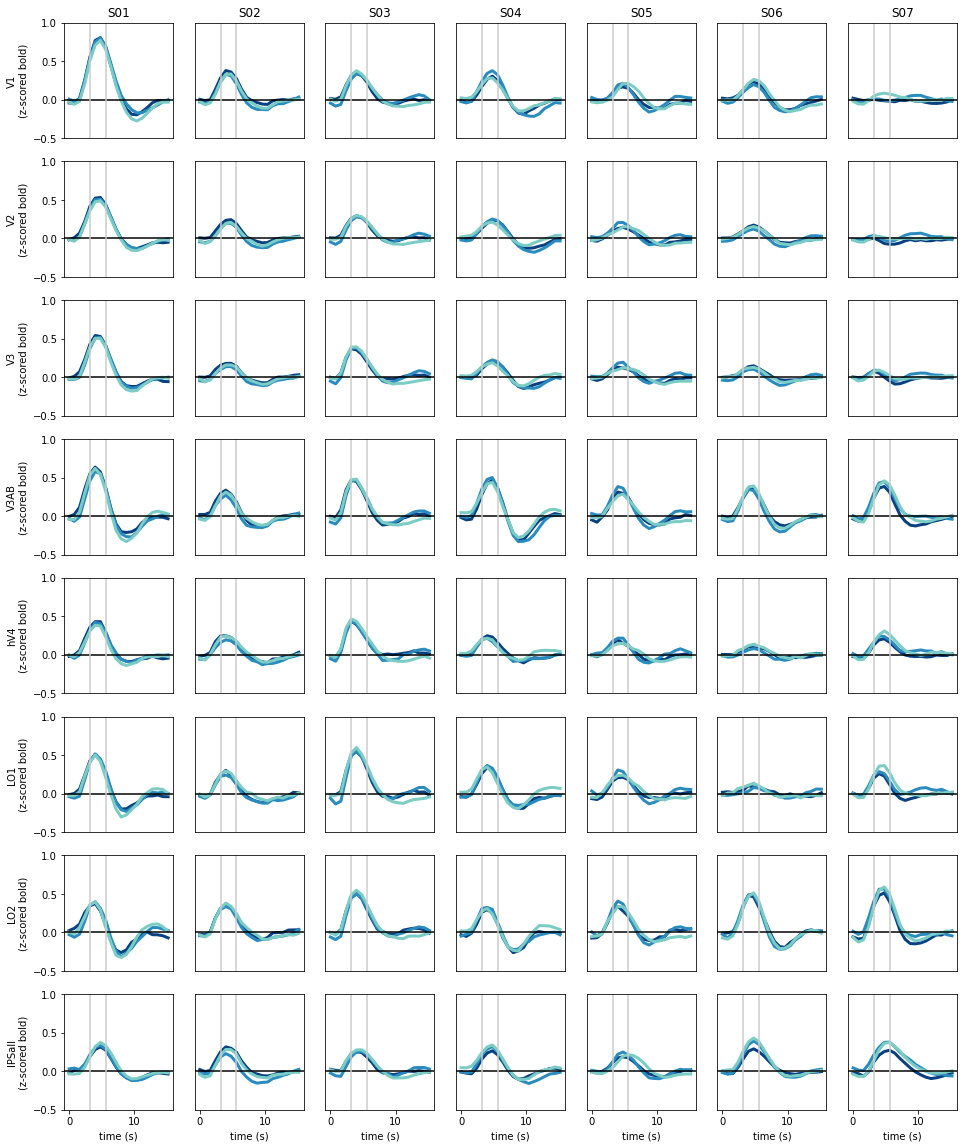

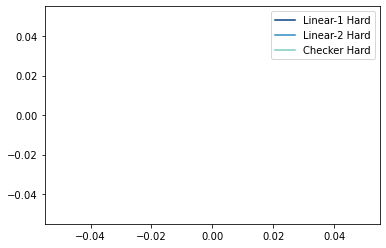

In [9]:
plt.figure(figsize=(16,20))

conds_plot = [1,3,5]
pi = 0;
for ri in range(n_rois):
    
    for si, ss in enumerate(subjects):

        pi+=1
        plt.subplot(n_rois, n_subjects, pi)
        
        hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
        
        for ci, cc in enumerate(conds_plot):

            plt.plot(time_axis, hrfs[:,cc], color=task_colors[ci, :], lw = 3)

        
        plt.ylim([-0.5, 1])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])
        
        if ri==0:
            plt.title('S%02d'%(ss))
        if ri<(n_rois-1):
            plt.xticks([])
        else:
            plt.xlabel('time (s)')
            
        if si==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
        else:
            plt.yticks([])
            
            
plt.figure()
for ti in range(4):
    plt.plot(0,0, color=task_colors[ti])
plt.legend(np.array(trial_cond_names)[conds_plot])


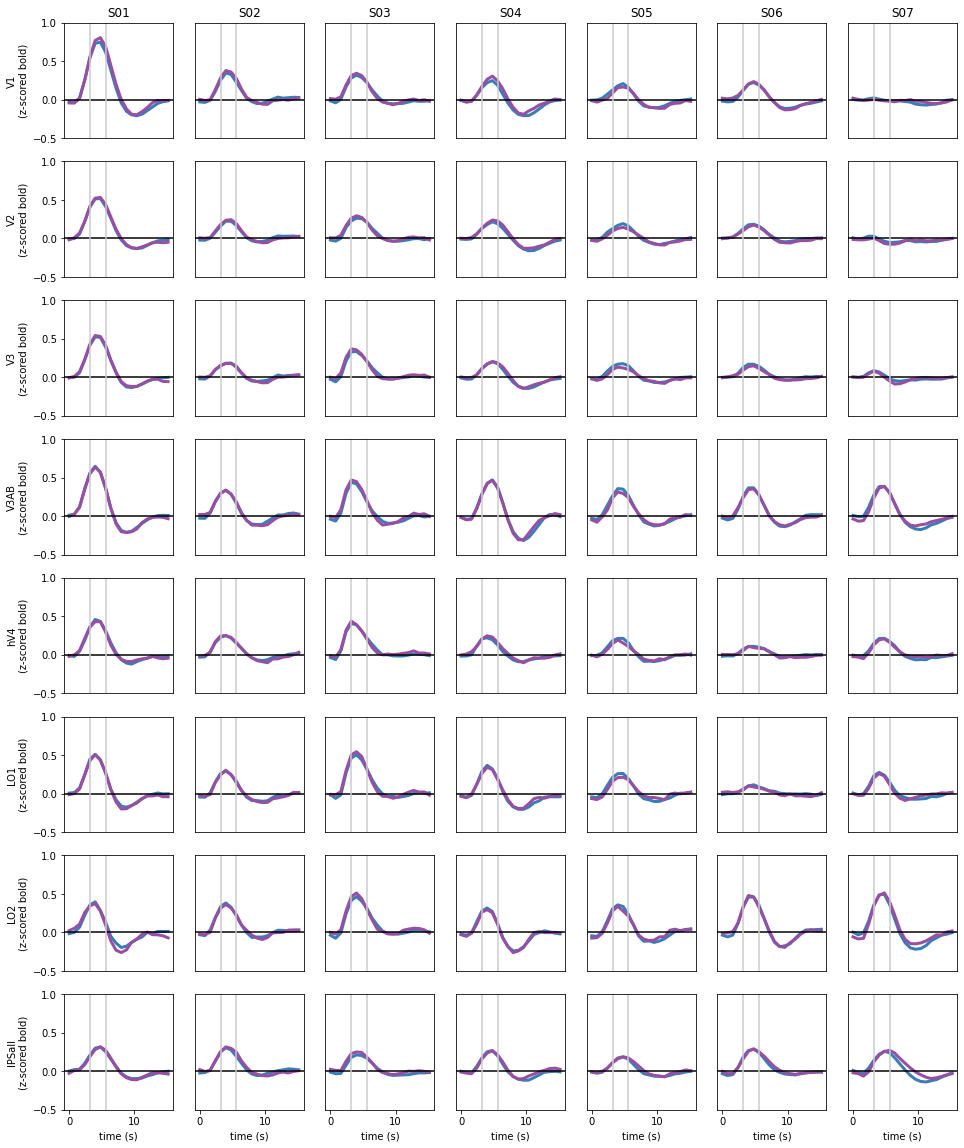

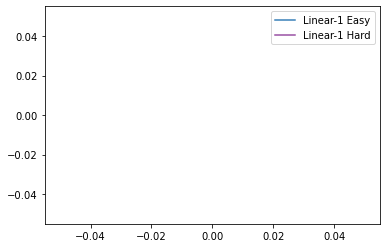

In [21]:
plt.figure(figsize=(16,20))

colors = cm.Set1(np.linspace(0,1,9))[[1,3],:]

conds_plot = [0,1]
pi = 0;
for ri in range(n_rois):
    
    for si, ss in enumerate(subjects):

        pi+=1
        plt.subplot(n_rois, n_subjects, pi)
        
        hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
        
        for ci, cc in enumerate(conds_plot):

            plt.plot(time_axis, hrfs[:,cc], color=colors[ci, :], lw = 3)

        
        plt.ylim([-0.5, 1])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])
        
        if ri==0:
            plt.title('S%02d'%(ss))
        if ri<(n_rois-1):
            plt.xticks([])
        else:
            plt.xlabel('time (s)')
            
        if si==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
        else:
            plt.yticks([])
            
            
plt.figure()
for ci in range(2):
    plt.plot(0,0, color=colors[ci])
plt.legend(np.array(trial_cond_names)[conds_plot])


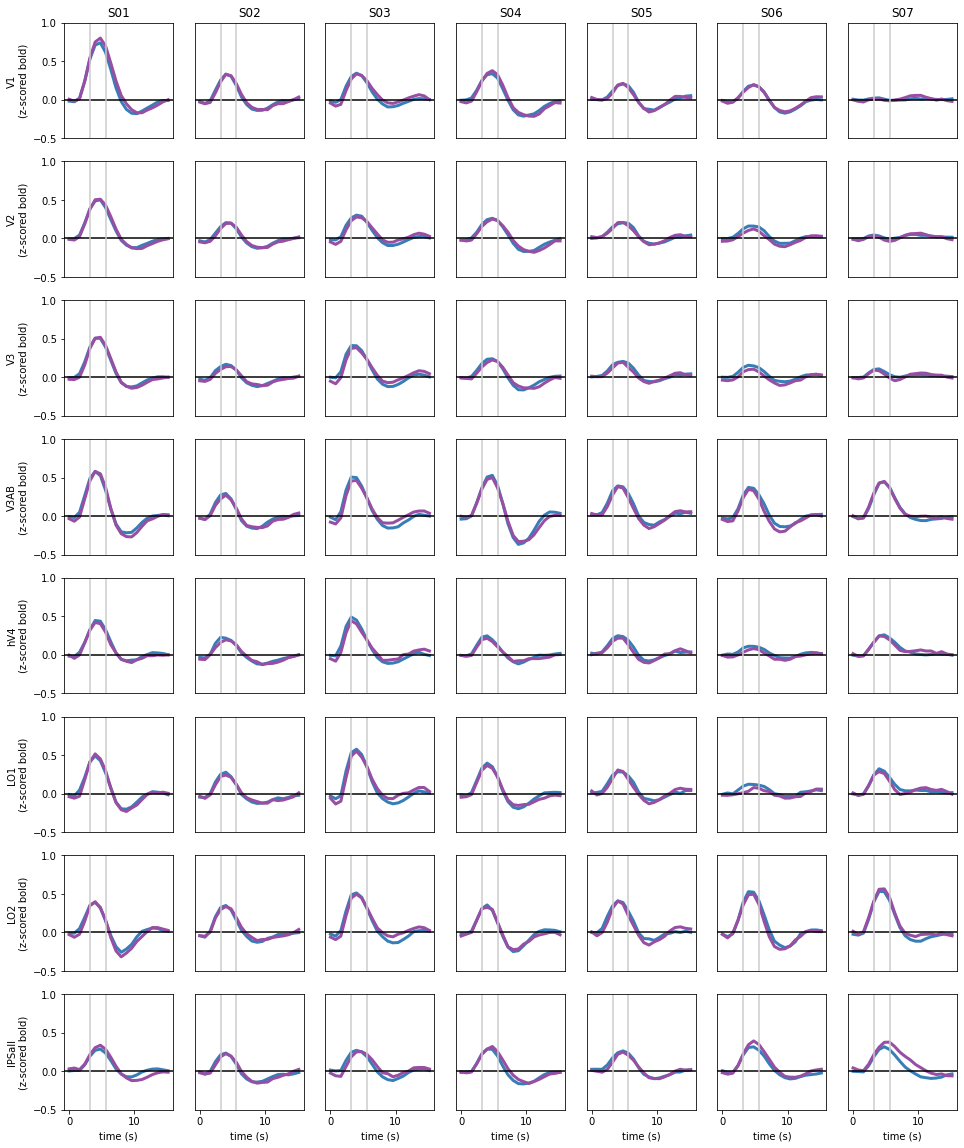

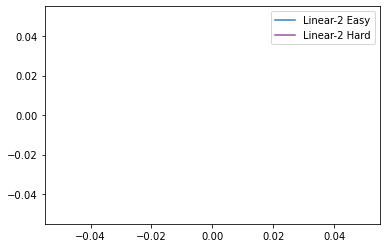

In [22]:
plt.figure(figsize=(16,20))

colors = cm.Set1(np.linspace(0,1,9))[[1,3],:]

conds_plot = [2,3]
pi = 0;
for ri in range(n_rois):
    
    for si, ss in enumerate(subjects):

        pi+=1
        plt.subplot(n_rois, n_subjects, pi)
        
        hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
        
        for ci, cc in enumerate(conds_plot):

            plt.plot(time_axis, hrfs[:,cc], color=colors[ci, :], lw = 3)

        
        plt.ylim([-0.5, 1])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])
        
        if ri==0:
            plt.title('S%02d'%(ss))
        if ri<(n_rois-1):
            plt.xticks([])
        else:
            plt.xlabel('time (s)')
            
        if si==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
        else:
            plt.yticks([])
            
            
plt.figure()
for ci in range(2):
    plt.plot(0,0, color=colors[ci])
plt.legend(np.array(trial_cond_names)[conds_plot])


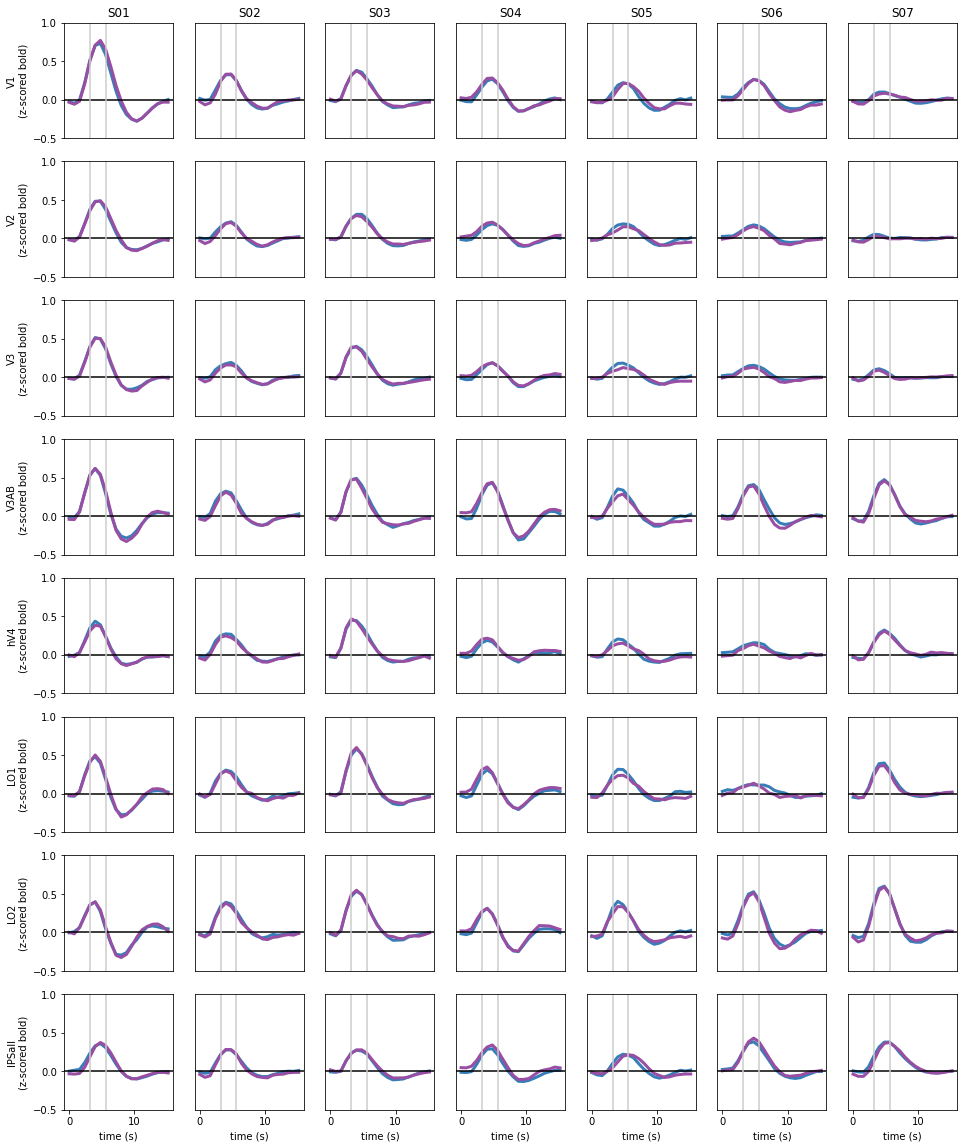

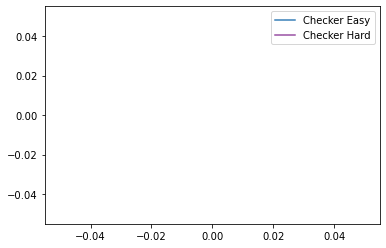

In [23]:
plt.figure(figsize=(16,20))

colors = cm.Set1(np.linspace(0,1,9))[[1,3],:]

conds_plot = [4,5]
pi = 0;
for ri in range(n_rois):
    
    for si, ss in enumerate(subjects):

        pi+=1
        plt.subplot(n_rois, n_subjects, pi)
        
        hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
        
        for ci, cc in enumerate(conds_plot):

            plt.plot(time_axis, hrfs[:,cc], color=colors[ci, :], lw = 3)

        
        plt.ylim([-0.5, 1])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])
        
        if ri==0:
            plt.title('S%02d'%(ss))
        if ri<(n_rois-1):
            plt.xticks([])
        else:
            plt.xlabel('time (s)')
            
        if si==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
        else:
            plt.yticks([])
            
            
plt.figure()
for ci in range(2):
    plt.plot(0,0, color=colors[ci])
plt.legend(np.array(trial_cond_names)[conds_plot])


In [11]:
n_trial_types = 2;
trial_type_names = ['Easy','Hard']
n_timepts = 20
trial_group_means = np.zeros((n_subjects, n_rois, n_tasks-1, n_trial_types, n_timepts))

for si in range(n_subjects):
    
    for ri in range(n_rois):
        
        hrfs = np.mean(h_all[si][ri]['hrfs'], axis=2)
    
        for ti, task_ind in enumerate([1,2,3]):
            
            for tyi in range(n_trial_types):
            
                ci = ti*n_trial_types + tyi

                trial_group_means[si,ri,ti,tyi,:] = hrfs[:,ci]


In [12]:
from code_utils import stats_utils

pvals_comparegroups = np.zeros((n_rois, n_tasks-1, 1, n_timepts))

rndseed = 4354564
for ri in range(n_rois):

    for ti, task_ind in enumerate([1,2,3]):
        
        for tpti in range(n_timepts):
        
            dat1 = trial_group_means[:,ri,ti,0,tpti]
            dat2 = trial_group_means[:,ri,ti,1,tpti]
            
            p,t = stats_utils.paired_ttest_nonpar(dat1, dat2, \
                                           n_iter=1000, \
                                                  # n_iter=2, \
                                                  rndseed=rndseed)    
        
            pvals_comparegroups[ri,ti,0,tpti] = p

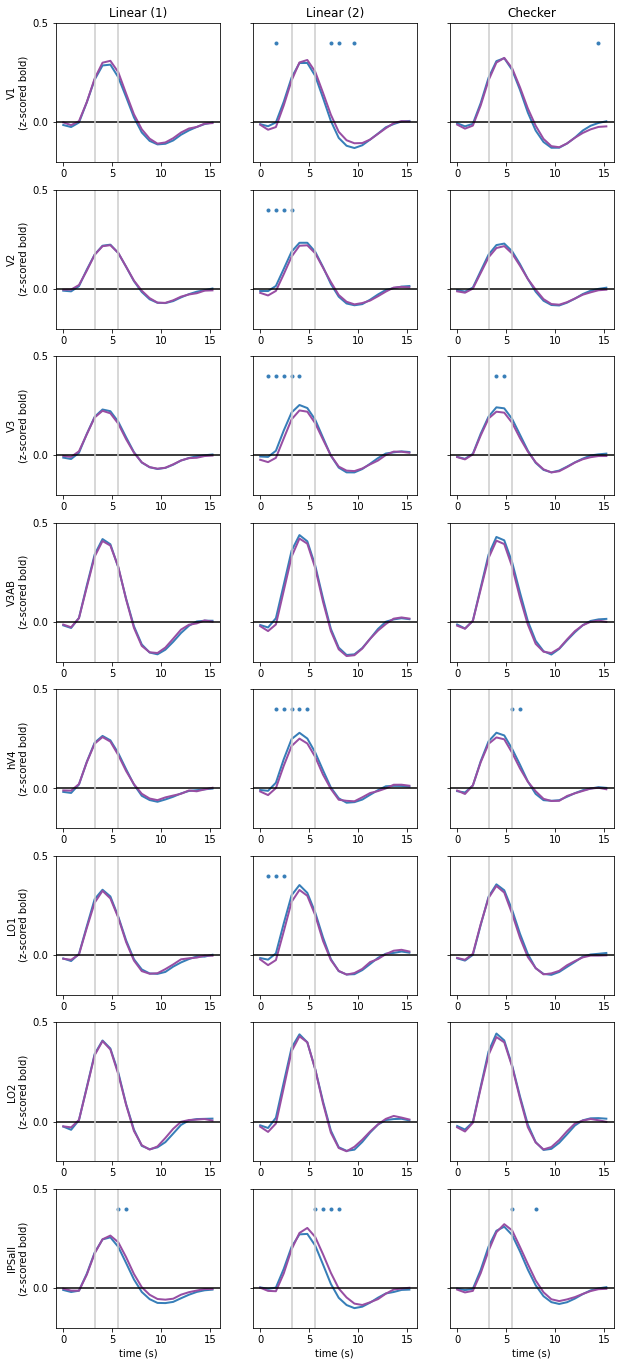

In [ ]:
plt.figure(figsize=(10,24))

colors = cm.Set1(np.linspace(0,1,9))[[1,3],:]

p_thresh = 0.05
sig_height_plot = 0.40

n_rois = len(roi_names)

pi = 0;
# for ri in range(1):
for ri in range(n_rois):
    
    for ti, task_ind in enumerate([1,2,3]):
         
        pi+=1
        plt.subplot(n_rois,3,pi)
        
        # for tgi in [0]:
        for tgi in [0,1]:
            dat = trial_group_means[:,ri,ti,tgi,:]
        
            # then average over subjects
            meanvals = np.mean(dat, axis=0)
            semvals = np.std(dat, axis=0)/np.sqrt(n_subjects)
            
            plt.plot(time_axis, meanvals, color=colors[tgi, :], lw = 2)
            # plt.errorbar(time_axis, meanvals, semvals, color=colors[tgi,:])
            # plt.fill_between(time_axis, meanvals-semvals, meanvals+semvals,color=colors[tgi,:], alpha=0.40)
            
        sig_diffs = pvals_comparegroups[ri,ti,0,:] < p_thresh
        for tpti in np.where(sig_diffs)[0]:
            plt.plot(time_axis[tpti], sig_height_plot, '.', color=colors[0,:])
            
        plt.ylim([-0.2, 0.5])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])

        if ri==0:
            plt.title(task_names[ti])
        
        if ri==(n_rois-1):
            plt.xlabel('time (s)')

        if ti==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
            plt.yticks([0, 0.5])
        else:
            plt.yticks([0, 0.5], [])
        